<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
#alternative table
      Inside Outside
Male  [[2   1]
Female [1   2]]
#difference - males twice as likely to eat inside
#small n
#no left tail - just says 'dependent'

In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=29.718882973567986, pvalue=3.520680040147523e-07)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
#chi square null hypothesis: the x/y values are independent (low chi)
#"sum of squared-standard-normals"
#expected value = k
#as k increases it normalizes (except there are no negative values)
#right skew --> normal
from scipy.stats import  chi2
chi2_5 = chi2(5)
chi2_5 #frozen distribution - so you can't rewrite this var with another k
chi2_5.mean() #5 - same as input k
chi2_5.median() #about 4.35 - right skew
chi2_500 = chi2(500)
chi2_500.mean() #500

500.0

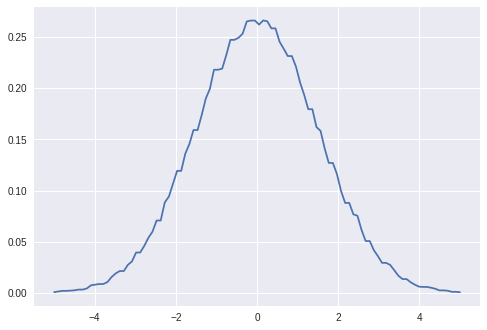

In [0]:
#histogram of random normals
import scipy
import numpy as np
import matplotlib.pyplot as plt
data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)
X = np.linspace(-5.0, 5.0, 100)
hist = np.histogram(data, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)
plt.plot(X, hist_dist.pdf(X), label='PDF')

In [0]:
#Normal Test - test the normality of chi-square above
from scipy.stats import normaltest
chi2_500.rvs(100) #n=100 from the chi2
normaltest(chi2_500.rvs(100)) #doesn't pass
normaltest(chi2_500.rvs(50)) #passes but isn't meaningful that low n
normaltest(chi2_500.rvs(100000)) #doesn't pass

NormaltestResult(statistic=246.9854129296452, pvalue=2.3323784871844912e-54)

In [0]:
#Chi-square by hand

import pandas as pd
chi_data = [[1,2],[2,1]] #eating pref
chi_data = pd.DataFrame(chi_data)

#margin count
#total males : 3
#total females: 3
#total outside: 3
#total inside: 3

#margin proportions
#males/females: 50%
#outside/inside: 50%

#if null hyp is true, how many people would we expect to be in any given cell?
#(males proportion * outside proportion * total males) --> (0.5 * 0.5 * 6)
#in this case all cells are 1.5
#k = 1.5

#what is the sum of square deviation from k in real data? (the chi-square)
expected_values = [[1.5, 1.5],[1.5,1.5]]
deviation = (((0.5)**2)/1.5) * 4 # (proportion squared / k) * number of cells
print(deviation)


0.6666666666666666


In [0]:
from scipy.stats import chisquare
chisquare(chi_data, axis=None)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [0]:
#chi square function from scratch
def lazy_chisquare(observed, expected):
  for row_obs, row_exp in zip(observed, expected):
    for obs, exp in zip(row_obs, row_exp):
      chisquare += (obs-exp)**2 / exp
  return chisquare

In [0]:
#interpretation: 
#
#df for calc p values: df = n(number of cells)-1
#our high p value means the large difference between gender and seating is
#unlikely to replicate/replicate with a larger n

In [0]:
#confidence interval
# a (alpha) is p
# the confidence interval of a graph is 1-a
# it is a probability range that excludes unlikely dists from the two a/2 tails
# it is a probability density function (PDF) - meaning dist totals to 1.0
# a 95th conf interval is one where a=0.95 (with 0.025 tails)

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  #this triple quote text is writing inline help() for the function
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

In [0]:
#function for formatting results of confidence_interval

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [0]:
x = 2
print('x is: {}'.format(x))

x is: 2


In [0]:
coinflips = np.random.binomial(n=1, p=0.5, size=100) #100 fair coinflips
#null: no preference heads or tails
stats.ttest_1samp(coinflips, 0.5)

df = pd.DataFrame(coinflips)
coinflip_interval = confidence_interval(coinflips) #default a=0.95
coinflip_interval #(center, lowbound, highbound)
report_confidence_interval(coinflip_interval) #includes null 0.5
#fail to reject null hypothesis at 95% confidence

'our mean lies in the interval ]0.35, 0.55['

In [0]:
#in media, confidence intervals are a preferred analysis over ttest

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [0]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names = ['party', 'handicapped-infants', 'water-project', 'budget',
         'physician-fee-freeze', 'el-salvador-aid', 'religious_groups_in_schools',
         'anti-satellite-test-ban', 'aid-to-contras', 'mx-missle', 'immigration',
         'synfuels-corp-cutback','education-spending','superfund-right-to-sue',
         'crime', 'duty-free-exports', 'export-SAfrica']
df = pd.read_csv(url, header=None, names=names)
df = df.replace({'?':np.nan, 'n':0, 'y':1, 'democrat':1, 'republican':0})
#Party 0 - Republican
#Party 1 - Democrat
#Vote 0 - negative
#Vote 1 - positive

In [0]:
budget = df[['party', 'budget']].dropna()
budget = budget.set_index(budget.party)
budget = budget['budget']

exports = df[['party', 'duty-free-exports']].dropna()
exports = exports.set_index(exports.party)
exports = exports['duty-free-exports']

water_project = df[['party', 'water-project']].dropna()
water_project = water_project.set_index(water_project.party)
water_project = water_project['water-project']

In [9]:
import scipy
from scipy import stats

def confidence_interval(data, confidence=0.95):
  mean = sum(data)/len(data)
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
  return (mean, mean-interval, mean+interval)

budget_confidence = confidence_interval(budget, confidence=0.95)
print(budget_confidence)

exports_confidence = confidence_interval(exports, confidence=0.95)
print(exports_confidence)

water_confidence = confidence_interval(water_project, confidence=0.95)
print(water_confidence)

(0.5966981132075472, 0.5498151808536169, 0.6435810455614774)
(0.4275184275184275, 0.3792525917327782, 0.4757842633040768)
(0.5038759689922481, 0.45384081311663604, 0.5539111248678601)


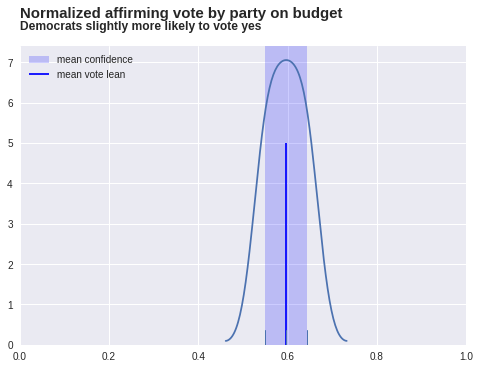

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(budget_confidence, hist=False, rug=True);
ax.axis(xmin=0, xmax=1, ymin=0)
ax.vlines(budget_confidence[0], 0, 5, colors='b', label='mean vote lean')
ax.axvspan(budget_confidence[1],budget_confidence[2], facecolor='b',
            alpha=0.2, label='mean confidence')
ax.text(0, 8.1, 'Normalized affirming vote by party on budget', fontsize=15, fontweight='bold')
ax.text(0, 7.8, 'Democrats slightly more likely to vote yes', fontsize=12, fontweight='bold')
ax.legend(loc='upper left');

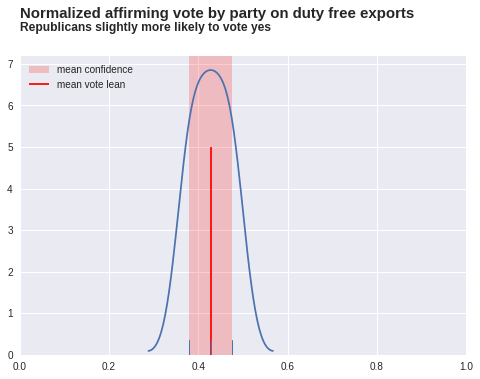

In [30]:
fig = plt.figure()
ax2 = fig.add_subplot (111)
sns.distplot(exports_confidence, hist=False, rug=True);
ax2.axis(xmin=0, xmax=1, ymin=0)
ax2.vlines(exports_confidence[0], 0, 5, colors='r', label='mean vote lean')
ax2.axvspan(exports_confidence[1],exports_confidence[2], facecolor='r',
            alpha=0.2, label='mean confidence')
ax2.text(0, 8.1, 'Normalized affirming vote by party on duty free exports', fontsize=15, fontweight='bold')
ax2.text(0, 7.8, 'Republicans slightly more likely to vote yes', fontsize=12, fontweight='bold')
ax2.legend(loc='upper left');

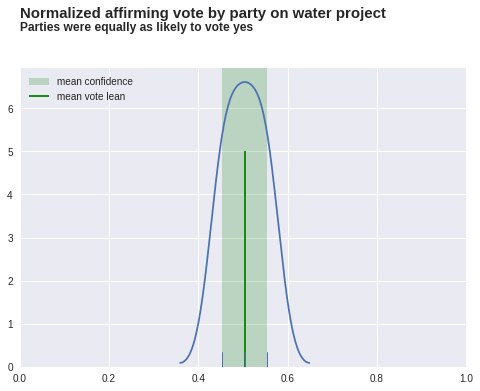

In [35]:
fig = plt.figure()
ax3 = fig.add_subplot (111)
sns.distplot(water_confidence, hist=False, rug=True);
ax3.axis(xmin=0, xmax=1, ymin=0)
ax3.vlines(water_confidence[0], 0, 5, colors='g', label='mean vote lean')
ax3.axvspan(water_confidence[1],water_confidence[2], facecolor='g',
            alpha=0.2, label='mean confidence')
ax3.text(0, 8.1, 'Normalized affirming vote by party on water project', fontsize=15, fontweight='bold')
ax3.text(0, 7.8, 'Parties were equally as likely to vote yes', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left');